In [8]:
# Setting up code imports

%tensorflow_version 2.x
%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
print(tf.__version__)
print(keras.__version__)
print(np.__version__)

2.2.0-rc3
2.3.0-tf
1.18.3


Using TensorFlow backend.


<h1>CAP4630: Artificial Intelligence</h1>

<h2>General concepts to AI:</h2>

**Artificial intelligence**
refers to the broader aspects of computerized learning and understanding, while **machine learning** refers to specialized algorithms and methods that allow for learning over time with increased testing and training data. 
**Deep learning** refers to the deep networks used to train machine learning algorithms, such as by using a deep neural network or a convolutional neural network (CNN). The basic formula for a supervised machine learning algorithm can be written as:

$input+output \rightarrow [machine] \rightarrow rules $,

where the algorithm/machine takes in some input and output images or data and generates some sort of rules or meaningful patterns based on the data. 

<h2>Basic concepts for AI:</h2>

**Labels** and **features** are used for machine learning algortihms. If provided with a label $y$ and feature $x_j$ in $j \in \{1,\ldots, n\}$, with $n$ representing the number of features, we can train a model $(x_j, y)$ such that it can learn the meaningful rules and relationships between the feature $x_j$ and the label $y$. Afterwards, we can use these relationships to generate a prediction $\hat{y}$ for the features that is close enough to the label $y$.

We can use different types of regression to help find 

**Linear regression** can be described as 

$\hat{y}=\sum^{n}_{j=1} w_j x_j + b$, 

with $b$ being the y-int. bias,  $w_j$ being the weight of datum $j$, and $x_j$ being the feature of datum $j$ (similar to $y=mx+b$, but $n$ describes the amount of weights used in the model). **Logistic regression** can be described similarly, as a function, as 

$\hat{y}=a(\sum^{n}_{j=1} w_j x_j + b)$, 

with the activation function $a(x)$ being equal to the sigmoid function 

$\sigma(x) = \dfrac{1}{1+e^{-z}}$.

We can combine this as $\hat{y} = \dfrac{1}{1+e^{(-\sum^{n}_{j=1} w_j x_j + b)}}$

The **loss function (MSE)** that we can use to describe the **gradient descent algorithm** can be described as

$\mathcal{L}$ = $1/m \sum^{m}_{i=1} 1/2(\hat{y}^{(i)} - y^{(i)})^2$.

After picking a starting point, the gradient descent algorithm calculates the gradient of the loss function $\mathcal{L}$ and then takes a step in the dir. of $-\nabla \mathcal{L}$ multiples times until the lowest point is reached on the curve or until the algorithm times out.

<h2>Building a model for AI:</h2>

When building a model, we want to make sure we have valid testing and training data. Here, in the code example, we use Keras with one layer of a dense neural network with a sigmoid activation. In this case, we generate testing and training data for use in our model. We cast the data to be split 80:20 between the training and testing sets.

[extracted from HW#3Problem#2.ipynb]

data.shape is (5000, 2)
labels.shape is (5000, 1)


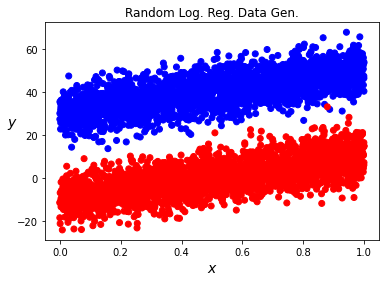

In [5]:
# generating data for our algorithm
def get_random_data(w, b, mu, sigma, m):
    data, labels = np.zeros((m, 2)), np.zeros((m, 1), dtype=int)
    for i in range(m):
        c = random.randrange(0, 2)
        x_1 = random.random()
        n = np.random.default_rng().normal(mu, sigma, 1)
        x_2 = w * x_1 + b + (-1)**c * n
        data[i, 0], data[i, 1] = x_1, x_2
        labels[i] = c
    return (data, labels)

def display_random_data(labels, data):
    datax, datay = np.split(data,[-1], axis = 1)
    pltclrs = ["red" if val == 1 else "blue" for val in labels]
    plt.scatter(datax, datay, c = pltclrs)
    plt.title("Random Log. Reg. Data Gen.")
    plt.xlabel("$x$", fontsize=14)
    plt.ylabel("$y$", rotation=0, fontsize=14)
    plt.show()

w, b, mu, sigma, m = 20, 10, 20, 6, 5000
data, labels = get_random_data(w, b, mu, sigma, m)
print("data.shape is", data.shape)
print("labels.shape is", labels.shape)
display_random_data(labels, data)

traindata, testdata = np.split(data, [int(0.8 * data.shape[0])])
trainlbl, testlbl = np.split(labels, [int(0.8 * labels.shape[0])])

def get_train_set():
    return (traindata, trainlbl)
def get_test_set():
    return (testdata, testlbl)
def get_w_and_b():
    return (w, b)

rdata, rlabel = get_train_set()
rdatax, rdatay = rdata[:, 0], rdata[:, 1]
tdata, tlabel = get_test_set()
tdatax, tdatay = tdata[:, 0], tdata[:, 1]

network = models.Sequential()
network.add(layers.Dense(1, activation = "sigmoid", input_shape=(2,)))

<h2>Compiling a model in AI:</h2>

We continue using machine learning practices by compiling a model. The **learning rate** for the algorithm helps determine how fast the algorithm "learns" by multiplying the rate to the gradient calculated at the convex point. The **optimizer** will help determine how the network will be updated based on the loss function. Types of optimizers include SGD (stochastic gradient descent), Adam, and Adagrad. Loss functions at this compilation stage help us to minimize how bad the network's guess what. Types of loss functions for helping us in this stage include: Mean squared error (MSE), categorical cross-entropy, and binary cross-entropy.

<h2>Training a model in AI:</h2>

Training a model involves evaluating training data into a network and finding accurate label $\hat{y}$ for the features $x$ inputted. **Overfitting** and **underfitting** correspond to not fitting the line to enough data and fitting the line to too much data, resepctively. For finding out the best fit line, it's important to find the right amount of training and testing data and making sure that it equivalently represents the data in question. 

[extracted from HW#3Problem#2.ipynb]

In [6]:
network.compile(optimizer=keras.optimizers.RMSprop(0.01), loss = "binary_crossentropy", metrics=["accuracy"])
network.fit(rdata, rlabel, epochs=500, batch_size=500, validation_data=(tdata, tlabel))
network.evaluate(tdata, tlabel)

Epoch 1/500
8/8 [==============================] - 0s 21ms/step - loss: 0.7441 - accuracy: 0.7175 - val_loss: 0.6082 - val_accuracy: 0.7240
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 0.5601 - accuracy: 0.7155 - val_loss: 0.4847 - val_accuracy: 0.7200
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 0.4721 - accuracy: 0.7168 - val_loss: 0.4394 - val_accuracy: 0.7340
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 0.4374 - accuracy: 0.7340 - val_loss: 0.4113 - val_accuracy: 0.7620
Epoch 5/500
8/8 [==============================] - 0s 4ms/step - loss: 0.4092 - accuracy: 0.7573 - val_loss: 0.3846 - val_accuracy: 0.7850
Epoch 6/500
8/8 [==============================] - 0s 4ms/step - loss: 0.3838 - accuracy: 0.7805 - val_loss: 0.3599 - val_accuracy: 0.8030
Epoch 7/500
8/8 [==============================] - 0s 5ms/step - loss: 0.3586 - accuracy: 0.8020 - val_loss: 0.3367 - val_accuracy: 0.8230
Epoch 8/500
8/8 [=========

[0.0028291181661188602, 0.9980000257492065]

[[16.213638  ]
 [-0.69692045]] [6.7139654]


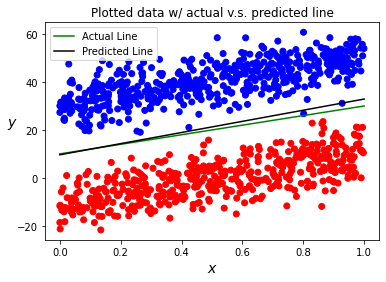

In [7]:
pred = network.predict(tdata)
weights, bias = network.get_weights()

# Plot actual data
pltclrs = ["red" if val == 1 else "blue" for val in tlabel]
#pltlbls = ["Label = 1" if val == 1 else "Label = 0" for val in tlabel]
plt.scatter(tdatax, tdatay, c = pltclrs)

# Plot actual reg. line
truew, trueb = get_w_and_b()
truex, truey = [0, 1], [trueb, truew + trueb]
plt.plot(truex, truey, "green", label = "Actual Line")

# Plot predicted reg. line
print(weights, bias)
predx = [0, 1]
predy = (-bias/weights[1]) + (-weights[0]/weights[1]) * predx
plt.plot(predx, predy, "black", label = "Predicted Line")
plt.title("Plotted data w/ actual v.s. predicted line")
plt.xlabel("$x$", fontsize = 14)
plt.ylabel("$y$", rotation = 0, fontsize = 14)
plt.legend()
plt.show()

<h2>Finetuning a pretrained model in AI:</h2>

We can use a previous model (in our case, ResNet50) to create and retrain a model for ourselves. 
Finetuning a model using a previous model involves:

- Employing a much smaller step size to go through the model more accurately

- More epochs (training stages)

[Code extracted from HW#4Problem#3Part#1.ipynb]

In [13]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

--2020-04-25 02:55:28--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 2607:f8b0:4001:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   213MB/s    in 0.3s    

2020-04-25 02:55:28 (213 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
from keras.applications.resnet50 import ResNet50

conv_base = ResNet50(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))
conv_base.trainable = False
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 36,695,425
Trainable params: 13,107,713
Non-trainable params: 23,587,712
_________________________________________________________________
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 294s 3s/step - loss: 0.4014 - acc: 0.8295 - val_loss: 0.6901 - val_acc: 0.4990
Epoch 2/30
100

In [0]:
# finetuning the pretrained model
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'res2a_branch2b':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

conv_base.summary()

# compile model

model.compile(
    loss='binary_crossentropy',
    #
    # choose a smaller learning rate
    #
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)